<a href="https://colab.research.google.com/github/aipalak/CV-DL/blob/main/Practice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ["KAGGLE_USERNAME"]="palak27"
os.environ["KAGGLE_KEY"] = "a9c6366cd0407ac517d026e146957691"
!kaggle datasets download andrewmvd/animal-faces

 99% 686M/696M [00:07<00:00, 108MB/s]
100% 696M/696M [00:07<00:00, 91.3MB/s]


In [2]:
!unzip animal-faces.zip

Streaming output truncated to the last 5000 lines.
  inflating: afhq/train/wild/flickr_wild_001378.jpg  
  inflating: afhq/train/wild/flickr_wild_001379.jpg  
  inflating: afhq/train/wild/flickr_wild_001380.jpg  
  inflating: afhq/train/wild/flickr_wild_001381.jpg  
  inflating: afhq/train/wild/flickr_wild_001382.jpg  
  inflating: afhq/train/wild/flickr_wild_001384.jpg  
  inflating: afhq/train/wild/flickr_wild_001385.jpg  
  inflating: afhq/train/wild/flickr_wild_001386.jpg  
  inflating: afhq/train/wild/flickr_wild_001387.jpg  
  inflating: afhq/train/wild/flickr_wild_001388.jpg  
  inflating: afhq/train/wild/flickr_wild_001389.jpg  
  inflating: afhq/train/wild/flickr_wild_001390.jpg  
  inflating: afhq/train/wild/flickr_wild_001391.jpg  
  inflating: afhq/train/wild/flickr_wild_001392.jpg  
  inflating: afhq/train/wild/flickr_wild_001393.jpg  
  inflating: afhq/train/wild/flickr_wild_001394.jpg  
  inflating: afhq/train/wild/flickr_wild_001395.jpg  
  inflating: afhq/train/wild/fl

In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from tqdm import tqdm
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.layers import LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
trainpath="dataset/train"
validpath="dataset/val"

In [5]:
class_names=os.listdir(trainpath)
class_names

['dog', 'cat', 'wild']

In [6]:
for name in class_names:
  path=trainpath+"/"+name
  n_images=len(os.listdir(path))
  print(name,":", n_images)


dog : 4739
cat : 5153
wild : 4738


In [7]:
for name in class_names:
  path=validpath+"/"+name
  n_images=len(os.listdir(path))
  print(name,":",n_images)

dog : 500
cat : 500
wild : 500


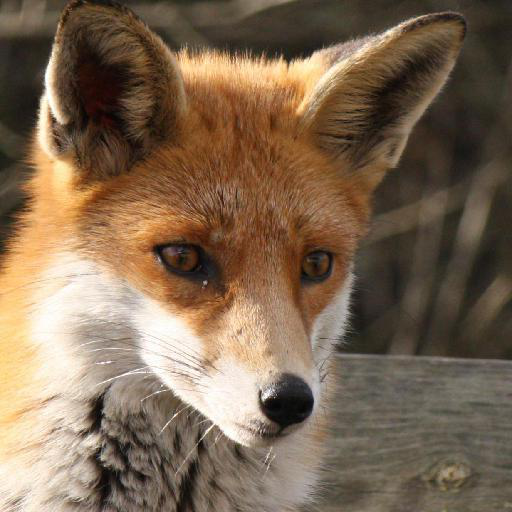

In [8]:
imgpath=trainpath+"/wild/flickr_wild_000002.jpg"
Image.open(imgpath)

In [9]:
img=cv2.imread(imgpath)
img.shape

(512, 512, 3)

In [10]:
#Image augmentation
image_data_gen=ImageDataGenerator(horizontal_flip=True,
                                  rescale=1/255)
x_train=image_data_gen.flow_from_directory(trainpath, target_size=(224,224), batch_size=4, class_mode="sparse")
x_val=image_data_gen.flow_from_directory(validpath,target_size=(224,224),batch_size=4,class_mode="sparse")

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [11]:
model=Sequential()
model.add(Conv2D(128, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256, (3,3), activation="relu"))
model.add(Conv2D(256, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256, (3,3), activation="relu"))
model.add(Conv2D(256, (3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation=LeakyReLU(0.1)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(512, activation=LeakyReLU(0.1)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(256, activation=LeakyReLU(0.1)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(128, activation=LeakyReLU(0.1)))
model.add(Dense(9, activation="sigmoid"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 128)    0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 256)     295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 256)     590080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 256)      0         
 2D)                                                    

In [13]:
losses=tf.keras.losses.SparseCategoricalCrossentropy()
optimizer=tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss=losses,metrics=['accuracy'])
history=model.fit(x_train,epochs=10,validation_data=x_val)

Epoch 1/10
3658/3658 [==============================] - 470s 123ms/step - loss: 1.0573 - accuracy: 0.4867 - val_loss: 0.8552 - val_accuracy: 0.6387
Epoch 2/10
3658/3658 [==============================] - 448s 123ms/step - loss: 0.9066 - accuracy: 0.5701 - val_loss: 0.5117 - val_accuracy: 0.8253
Epoch 3/10
3658/3658 [==============================] - 448s 122ms/step - loss: 0.6271 - accuracy: 0.7476 - val_loss: 0.5124 - val_accuracy: 0.8353
Epoch 4/10
3658/3658 [==============================] - 447s 122ms/step - loss: 0.5826 - accuracy: 0.7640 - val_loss: 0.4885 - val_accuracy: 0.8260
Epoch 5/10
3658/3658 [==============================] - 445s 122ms/step - loss: 0.5096 - accuracy: 0.8016 - val_loss: 0.3310 - val_accuracy: 0.9087
Epoch 6/10
3658/3658 [==============================] - 446s 122ms/step - loss: 0.4766 - accuracy: 0.8139 - val_loss: 0.4080 - val_accuracy: 0.8587
Epoch 7/10
3658/3658 [==============================] - 445s 122ms/step - loss: 0.4536 - accuracy: 0.8245 - val_

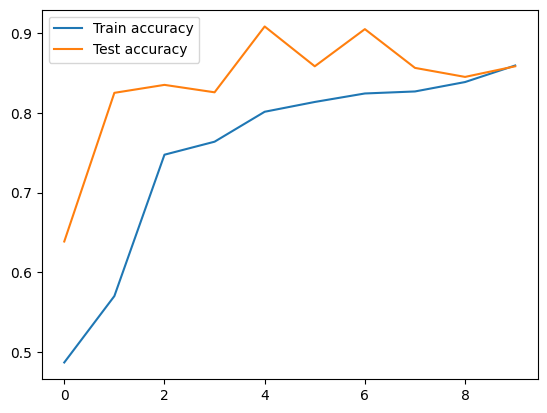

In [16]:
plt.plot(history.history['accuracy'],label="Train accuracy")
plt.plot(history.history['val_accuracy'],label="Test accuracy")
plt.legend()
plt.show()

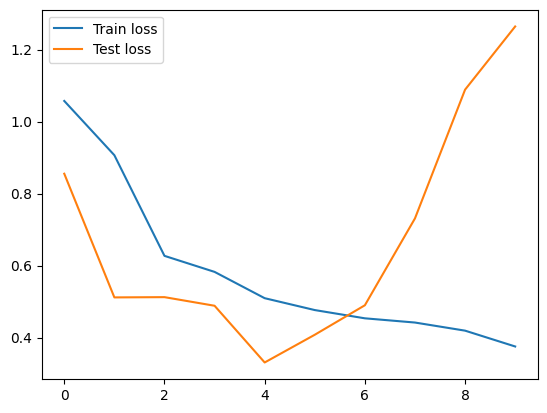

In [17]:
plt.plot(history.history['loss'],label="Train loss")
plt.plot(history.history['val_loss'],label="Test loss")
plt.legend()
plt.show()

In [18]:
model.evaluate(x_val)

375/375 [==============================] - 17s 44ms/step - loss: 1.2577 - accuracy: 0.8633


[1.2577400207519531, 0.8633333444595337]

In [19]:
y_pred = model.predict(x_val)

375/375 [==============================] - 18s 48ms/step


In [20]:
y_pred[0]

array([9.9999774e-01, 1.1086951e-02, 4.1768916e-02, 1.4651048e-09,
       3.8057197e-09, 8.7170172e-08, 2.2095801e-08, 9.5952779e-10,
       9.5698183e-10], dtype=float32)

In [22]:
yok=np.argmax(y_pred, axis=1)
yok

array([0, 2, 0, ..., 1, 2, 0])

In [23]:
y_pred.shape

(1500, 9)

In [25]:
yok[0]

0

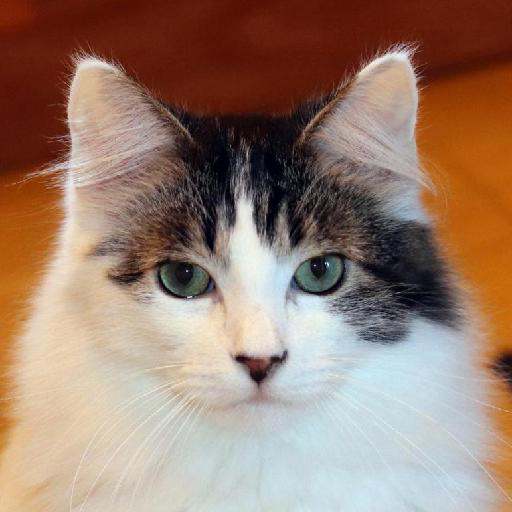

In [29]:
Image.open("dataset/val/cat/flickr_cat_000008.jpg")
